### imports

In [1]:
import os
from dotenv import load_dotenv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from google.oauth2 import service_account
from ebmdatalab import bq

### data extraction

In [2]:
load_dotenv()

credentials = os.environ["EBMDATALAB_BQ_CREDENTIALS_PATH"]

PROJECT_ID = "ebmdatalab"

credentials = service_account.Credentials.from_service_account_file(credentials)

In [3]:
flumazenil_query = f"SELECT * FROM scmd.scmd_full WHERE vmp_name LIKE '%Flumazenil%'"

df_flumazenil = bq.cached_read(sql=flumazenil_query, csv_path="../data/scmd_flumazenil.csv", use_cache=True)

In [4]:
df_flumazenil.tail()

,year_month,indicative_cost,quantity,uom,ods_code,ods_name,region,vmp_code,vtm,vtm_name,...,unit_dose_uom,dform_form,vmp_name,ing,strnt_nmrtr_val,strnt_dnmtr_val,strnt_nmrtr_uom_name,strnt_dnmtr_uom_name,ing_nm,droute_description
9056,2021-07-01,700.0,250.0,ML,RYR,Western Sussex Hospitals NHS Foundation Trust,South East,36067711000001104,775985005,Flumazenil,...,ampoule,Solution for injection,Flumazenil 500micrograms/5ml solution for inje...,387575000,100.0,1.0,microgram,ml,Flumazenil,Intravenous
9057,2023-05-01,3920.0,1400.0,ML,RYR,Western Sussex Hospitals NHS Foundation Trust,South East,36067711000001104,775985005,Flumazenil,...,ampoule,Solution for injection,Flumazenil 500micrograms/5ml solution for inje...,387575000,100.0,1.0,microgram,ml,Flumazenil,Intravenous
9058,2023-01-01,1400.0,500.0,ML,RYR,Western Sussex Hospitals NHS Foundation Trust,South East,36067711000001104,775985005,Flumazenil,...,ampoule,Solution for injection,Flumazenil 500micrograms/5ml solution for inje...,387575000,100.0,1.0,microgram,ml,Flumazenil,Intravenous
9059,2023-12-01,2660.0,950.0,ML,RYR,Western Sussex Hospitals NHS Foundation Trust,South East,36067711000001104,775985005,Flumazenil,...,ampoule,Solution for injection,Flumazenil 500micrograms/5ml solution for inje...,387575000,100.0,1.0,microgram,ml,Flumazenil,Intravenous
9060,2021-12-01,1960.0,700.0,ML,RYR,Western Sussex Hospitals NHS Foundation Trust,South East,36067711000001104,775985005,Flumazenil,...,ampoule,Solution for injection,Flumazenil 500micrograms/5ml solution for inje...,387575000,100.0,1.0,microgram,ml,Flumazenil,Intravenous


In [5]:
df_flumazenil.columns

Index(['year_month', 'indicative_cost', 'quantity', 'uom', 'ods_code',
       'ods_name', 'region', 'vmp_code', 'vtm', 'vtm_name', 'df_ind', 'udfs',
       'udfs_uom', 'unit_dose_uom', 'dform_form', 'vmp_name', 'ing',
       'strnt_nmrtr_val', 'strnt_dnmtr_val', 'strnt_nmrtr_uom_name',
       'strnt_dnmtr_uom_name', 'ing_nm', 'droute_description'],
      dtype='object')

In [6]:
df_flumazenil["droute_description"].value_counts()

droute_description
Intravenous    9061
Name: count, dtype: int64

### splitting dates to year & month

In [7]:
df_flumazenil["year_month"] = pd.to_datetime(df_flumazenil["year_month"])

df_flumazenil["year"] = df_flumazenil["year_month"].dt.year
df_flumazenil["month"] = df_flumazenil["year_month"].dt.month

# df_flumazenil.drop('year_month', inplace=True, axis=1)

df_flumazenil = df_flumazenil[['year_month', 'year', 'month', 'indicative_cost', 'quantity', 'uom', 'ods_code',
       'ods_name', 'region', 'vmp_code', 'vtm', 'vtm_name', 'df_ind', 'udfs',
       'udfs_uom', 'unit_dose_uom', 'dform_form', 'vmp_name', 'ing',
       'strnt_nmrtr_val', 'strnt_dnmtr_val', 'strnt_nmrtr_uom_name',
       'strnt_dnmtr_uom_name', 'ing_nm', 'droute_description']]

df_flumazenil.head()

,year_month,year,month,indicative_cost,quantity,uom,ods_code,ods_name,region,vmp_code,...,unit_dose_uom,dform_form,vmp_name,ing,strnt_nmrtr_val,strnt_dnmtr_val,strnt_nmrtr_uom_name,strnt_dnmtr_uom_name,ing_nm,droute_description
0,2023-06-01,2023,6,420.0,150.0,ML,RR7,Gateshead Health NHS Foundation Trust,North East,36067711000001104,...,ampoule,Solution for injection,Flumazenil 500micrograms/5ml solution for inje...,387575000,100.0,1.0,microgram,ml,Flumazenil,Intravenous
1,2023-06-01,2023,6,308.0,110.0,ML,RCU,Sheffield Children's NHS Foundation Trust,Yorkshire and The Humber,36067711000001104,...,ampoule,Solution for injection,Flumazenil 500micrograms/5ml solution for inje...,387575000,100.0,1.0,microgram,ml,Flumazenil,Intravenous
2,2023-06-01,2023,6,140.0,50.0,ML,RY3,Norfolk Community Health and Care NHS Trust,East of England,36067711000001104,...,ampoule,Solution for injection,Flumazenil 500micrograms/5ml solution for inje...,387575000,100.0,1.0,microgram,ml,Flumazenil,Intravenous
3,2023-06-01,2023,6,140.0,50.0,ML,RBS,Alder Hey Children's NHS Foundation Trust,North West,36067711000001104,...,ampoule,Solution for injection,Flumazenil 500micrograms/5ml solution for inje...,387575000,100.0,1.0,microgram,ml,Flumazenil,Intravenous
4,2023-06-01,2023,6,140.0,50.0,ML,RXE,Rotherham Doncaster and South Humber NHS Found...,Yorkshire and The Humber,36067711000001104,...,ampoule,Solution for injection,Flumazenil 500micrograms/5ml solution for inje...,387575000,100.0,1.0,microgram,ml,Flumazenil,Intravenous


In [8]:
for col in df_flumazenil.columns:
    print(df_flumazenil[col].value_counts())

year_month
2020-05-01    197
2019-06-01    186
2020-10-01    186
2020-06-01    183
2020-09-01    182
2020-04-01    177
2020-03-01    174
2020-11-01    174
2019-05-01    170
2024-01-01    169
2020-08-01    168
2020-07-01    167
2019-07-01    165
2023-10-01    163
2021-11-01    163
2021-01-01    163
2022-03-01    162
2021-10-01    159
2023-11-01    157
2019-12-01    157
2020-01-01    157
2023-12-01    156
2023-07-01    155
2021-06-01    153
2023-04-01    152
2023-05-01    151
2020-02-01    151
2019-08-01    150
2023-03-01    150
2020-12-01    149
2022-04-01    147
2023-09-01    147
2023-08-01    147
2019-10-01    147
2019-04-01    146
2024-02-01    146
2021-03-01    146
2021-09-01    145
2022-01-01    145
2021-07-01    145
2022-10-01    141
2021-12-01    141
2023-06-01    140
2021-02-01    140
2022-05-01    139
2019-11-01    139
2019-09-01    138
2022-02-01    137
2022-09-01    136
2021-04-01    134
2021-05-01    132
2022-11-01    131
2023-02-01    131
2022-06-01    130
2021-08-01    127

In [9]:
df_flumazenil["strnt_dnmtr_val"].unique()

array([1.])

### number of doses of midazolam prescribed per instance

In [10]:
df_flumazenil["udfs"] = df_flumazenil["udfs"].astype(float)
df_flumazenil["num_of_doses"] = df_flumazenil["quantity"]

df_flumazenil.loc[df_flumazenil["df_ind"] == "Discrete", 'num_of_doses'] = df_flumazenil["quantity"]/df_flumazenil["udfs"]

### dose of midazolam prescribed per instance

In [11]:
df_flumazenil["dose"] = df_flumazenil["strnt_nmrtr_val"] / df_flumazenil["strnt_dnmtr_val"]
df_flumazenil.head()

,year_month,year,month,indicative_cost,quantity,uom,ods_code,ods_name,region,vmp_code,...,vmp_name,ing,strnt_nmrtr_val,strnt_dnmtr_val,strnt_nmrtr_uom_name,strnt_dnmtr_uom_name,ing_nm,droute_description,num_of_doses,dose
0,2023-06-01,2023,6,420.0,150.0,ML,RR7,Gateshead Health NHS Foundation Trust,North East,36067711000001104,...,Flumazenil 500micrograms/5ml solution for inje...,387575000,100.0,1.0,microgram,ml,Flumazenil,Intravenous,30.0,100.0
1,2023-06-01,2023,6,308.0,110.0,ML,RCU,Sheffield Children's NHS Foundation Trust,Yorkshire and The Humber,36067711000001104,...,Flumazenil 500micrograms/5ml solution for inje...,387575000,100.0,1.0,microgram,ml,Flumazenil,Intravenous,22.0,100.0
2,2023-06-01,2023,6,140.0,50.0,ML,RY3,Norfolk Community Health and Care NHS Trust,East of England,36067711000001104,...,Flumazenil 500micrograms/5ml solution for inje...,387575000,100.0,1.0,microgram,ml,Flumazenil,Intravenous,10.0,100.0
3,2023-06-01,2023,6,140.0,50.0,ML,RBS,Alder Hey Children's NHS Foundation Trust,North West,36067711000001104,...,Flumazenil 500micrograms/5ml solution for inje...,387575000,100.0,1.0,microgram,ml,Flumazenil,Intravenous,10.0,100.0
4,2023-06-01,2023,6,140.0,50.0,ML,RXE,Rotherham Doncaster and South Humber NHS Found...,Yorkshire and The Humber,36067711000001104,...,Flumazenil 500micrograms/5ml solution for inje...,387575000,100.0,1.0,microgram,ml,Flumazenil,Intravenous,10.0,100.0


### trusts which prescribed safe dose

In [12]:
safe_dose_df = df_flumazenil[df_flumazenil["dose"] == 1.0]
print(f"Out of {len(df_flumazenil['ods_name'].unique())} trusts, {len(safe_dose_df['ods_name'].unique())} prescribed the right dose of 1mg/1ml")
# safe_dose_df.groupby("ods_name")["dose"].count().sort_values(ascending=False)[:-10].plot(kind="bar")

Out of 219 trusts, 0 prescribed the right dose of 1mg/1ml


In [13]:
trusts_safe_dose = set(safe_dose_df['ods_name'].unique())
all_trusts = set(df_flumazenil['ods_name'].unique())

trusts_high_dose = all_trusts.difference(trusts_safe_dose)
print(f"Trusts not given safe dose: {len(trusts_high_dose)} and they are \n {list(trusts_high_dose)}")

Trusts not given safe dose: 219 and they are 
 ['Liverpool Heart and Chest Hospital NHS Foundation Trust', 'Central London Community Healthcare NHS Trust', 'Lancashire Teaching Hospitals NHS Foundation Trust', 'Surrey and Sussex Healthcare NHS Trust', 'South Tees Hospitals NHS Foundation Trust', 'Isle of Wight NHS Trust', "Liverpool Women's NHS Foundation Trust", 'South Tyneside and Sunderland NHS Foundation Trust (prev: South Tyneside NHS Foundation Trust)', 'Royal Papworth Hospital NHS Foundation Trust', 'Sussex Partnership NHS Foundation Trust', 'Dorset County Hospital NHS Foundation Trust', 'Birmingham Community Healthcare NHS Foundation Trust', 'South Tyneside and Sunderland NHS Foundation Trust', 'Black Country Healthcare NHS Foundation Trust', 'Hertfordshire Community NHS Trust', 'Avon and Wiltshire Mental Health Partnership NHS Trust', 'St Helens and Knowsley Teaching Hospitals NHS Trust', 'University Hospitals Bristol and Weston NHS Foundation Trust', 'Midlands Partnership NHS

### number of times each dose is prescribed

There are 1 doses of midazolam prescribed


/var/folders/kg/k6g30scn6qn74wmjjrw4hky80000gn/T/ipykernel_94111/2131867272.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(formatted_labels)


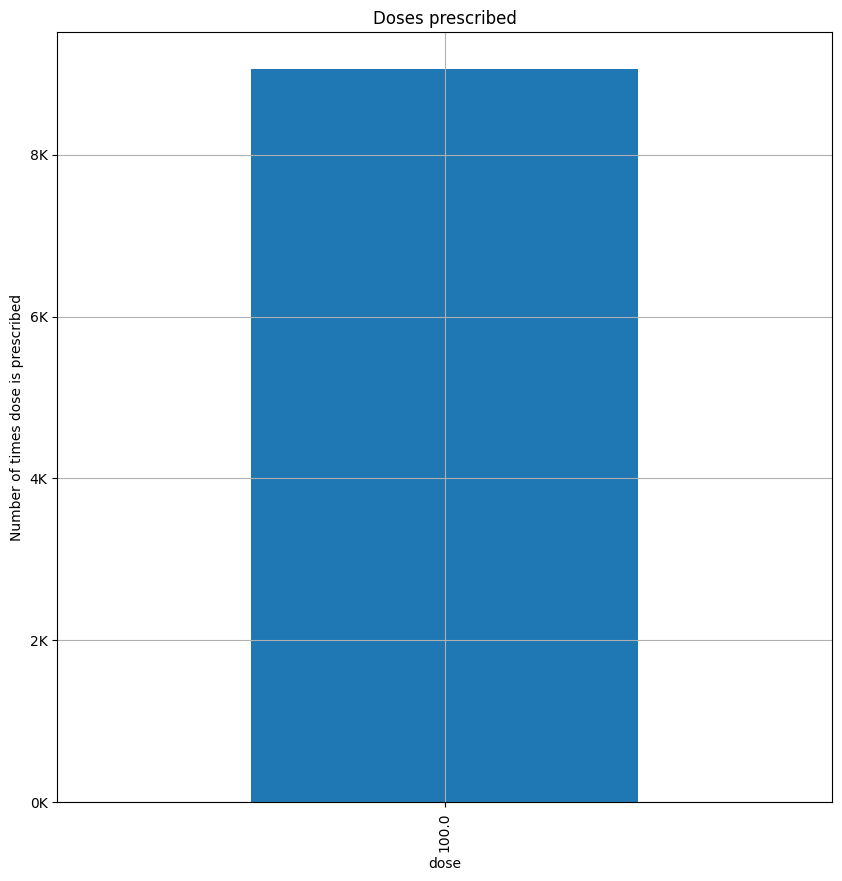

In [14]:
figure = plt.figure(figsize=(10,10))
plt.ticklabel_format(style="plain")
plt.ylabel("Number of times dose is prescribed")

print(f"There are {len(df_flumazenil['dose'].unique())} doses of midazolam prescribed")
df_flumazenil['dose'].value_counts().plot(kind='bar', rot=90)

current_values = plt.gca().get_yticks()
formatted_labels = [f'{int(value/1000)}K' for value in current_values]
plt.gca().set_yticklabels(formatted_labels)

plt.title("Doses prescribed")
plt.grid()
plt.show()

### yearly trend in low dose prescription

/var/folders/kg/k6g30scn6qn74wmjjrw4hky80000gn/T/ipykernel_94111/2506658361.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(formatted_labels)


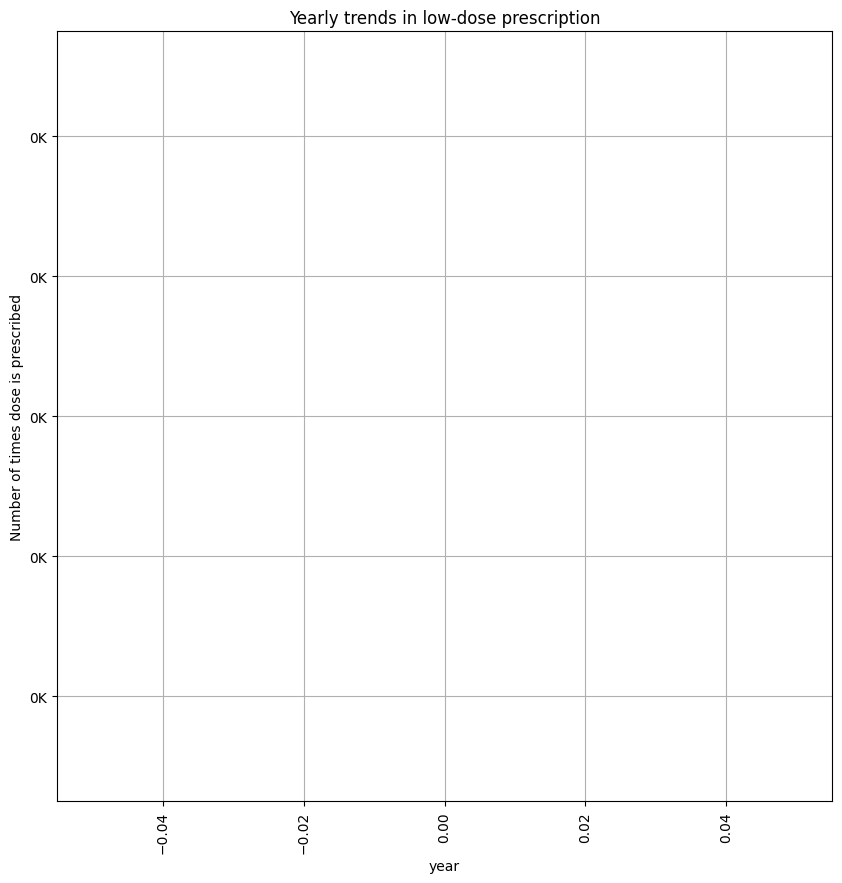

In [15]:
figure = plt.figure(figsize=(10,10))
plt.ticklabel_format(style="plain")
plt.ylabel("Number of times dose is prescribed")

safe_dose_df.groupby('year')['dose'].sum().plot(rot=90)

current_values = plt.gca().get_yticks()
formatted_labels = [f'{int(value/1000)}K' for value in current_values]
plt.gca().set_yticklabels(formatted_labels)

plt.title("Yearly trends in low-dose prescription")
plt.grid()
plt.show()

### yearly trends in high dose prescription

/var/folders/kg/k6g30scn6qn74wmjjrw4hky80000gn/T/ipykernel_94111/2486010651.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(formatted_labels)


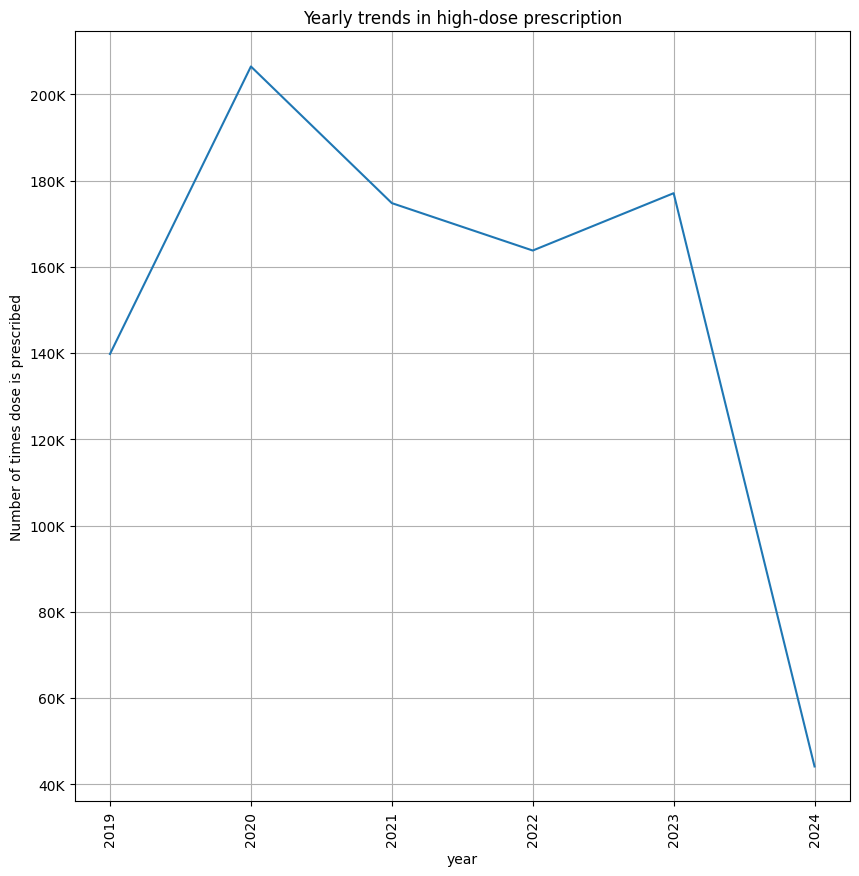

In [16]:
high_dose_df = df_flumazenil[df_flumazenil["dose"] != 1.0]

figure = plt.figure(figsize=(10,10))
plt.ticklabel_format(style="plain")
plt.ylabel("Number of times dose is prescribed")

high_dose_df.groupby('year')['dose'].sum().plot(rot=90)

current_values = plt.gca().get_yticks()
formatted_labels = [f'{int(value/1000)}K' for value in current_values]
plt.gca().set_yticklabels(formatted_labels)

plt.title("Yearly trends in high-dose prescription")
plt.grid()
plt.show()

### dosage forms of Midazolam prescribed 

In [17]:
print(f"There are {len(df_flumazenil.dform_form.unique())} dosage forms of Midazolam prescribed and they are: \n {df_flumazenil.dform_form.unique()}")

There are 1 dosage forms of Midazolam prescribed and they are: 
 ['Solution for injection']


### quantity of dosage forms prescribed

In [18]:
dfd = df_flumazenil.drop_duplicates(subset=["vmp_code", "dform_form"])
dfd["dform_form"].value_counts()

dform_form
Solution for injection    1
Name: count, dtype: int64

There are 1 dosage forms of midazolam


/var/folders/kg/k6g30scn6qn74wmjjrw4hky80000gn/T/ipykernel_94111/1075145481.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(formatted_labels)


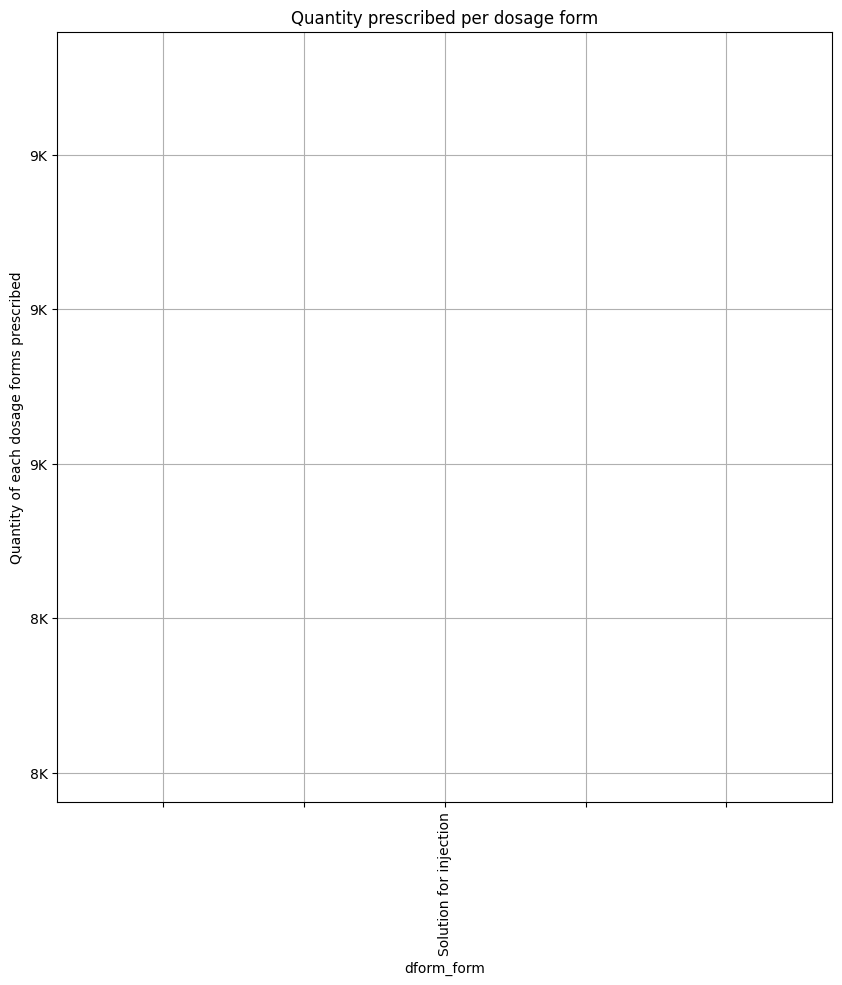

In [19]:
figure = plt.figure(figsize=(10,10))
plt.ticklabel_format(style="plain")
plt.ylabel("Quantity of each dosage forms prescribed")

print(f"There are {len(df_flumazenil['dform_form'].unique())} dosage forms of midazolam")
df_flumazenil["dform_form"].value_counts().plot(rot=90)

current_values = plt.gca().get_yticks()
formatted_labels = [f'{int(value/1000)}K' for value in current_values]
plt.gca().set_yticklabels(formatted_labels)

plt.title("Quantity prescribed per dosage form")
plt.grid()
plt.show()

### route of administration

There are 1 dosage forms of midazolam


/var/folders/kg/k6g30scn6qn74wmjjrw4hky80000gn/T/ipykernel_94111/3694905144.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(formatted_labels)


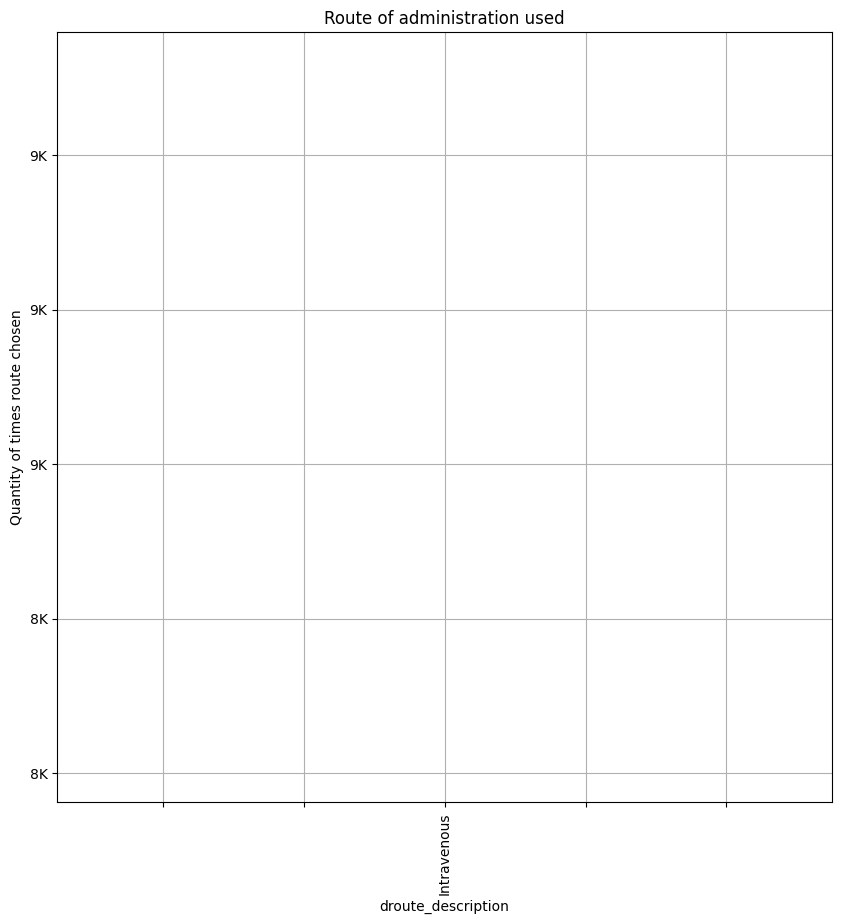

In [20]:
figure = plt.figure(figsize=(10,10))
plt.ticklabel_format(style="plain")
plt.ylabel("Quantity of times route chosen")

print(f"There are {len(df_flumazenil['droute_description'].unique())} dosage forms of midazolam")
df_flumazenil["droute_description"].value_counts().plot(rot=90)

current_values = plt.gca().get_yticks()
formatted_labels = [f'{int(value/1000)}K' for value in current_values]
plt.gca().set_yticklabels(formatted_labels)

plt.title("Route of administration used")
plt.grid()
plt.show()

### companies prescribing midazolam and lidocaine combination

IndexError: index 0 is out of bounds for axis 0 with size 0

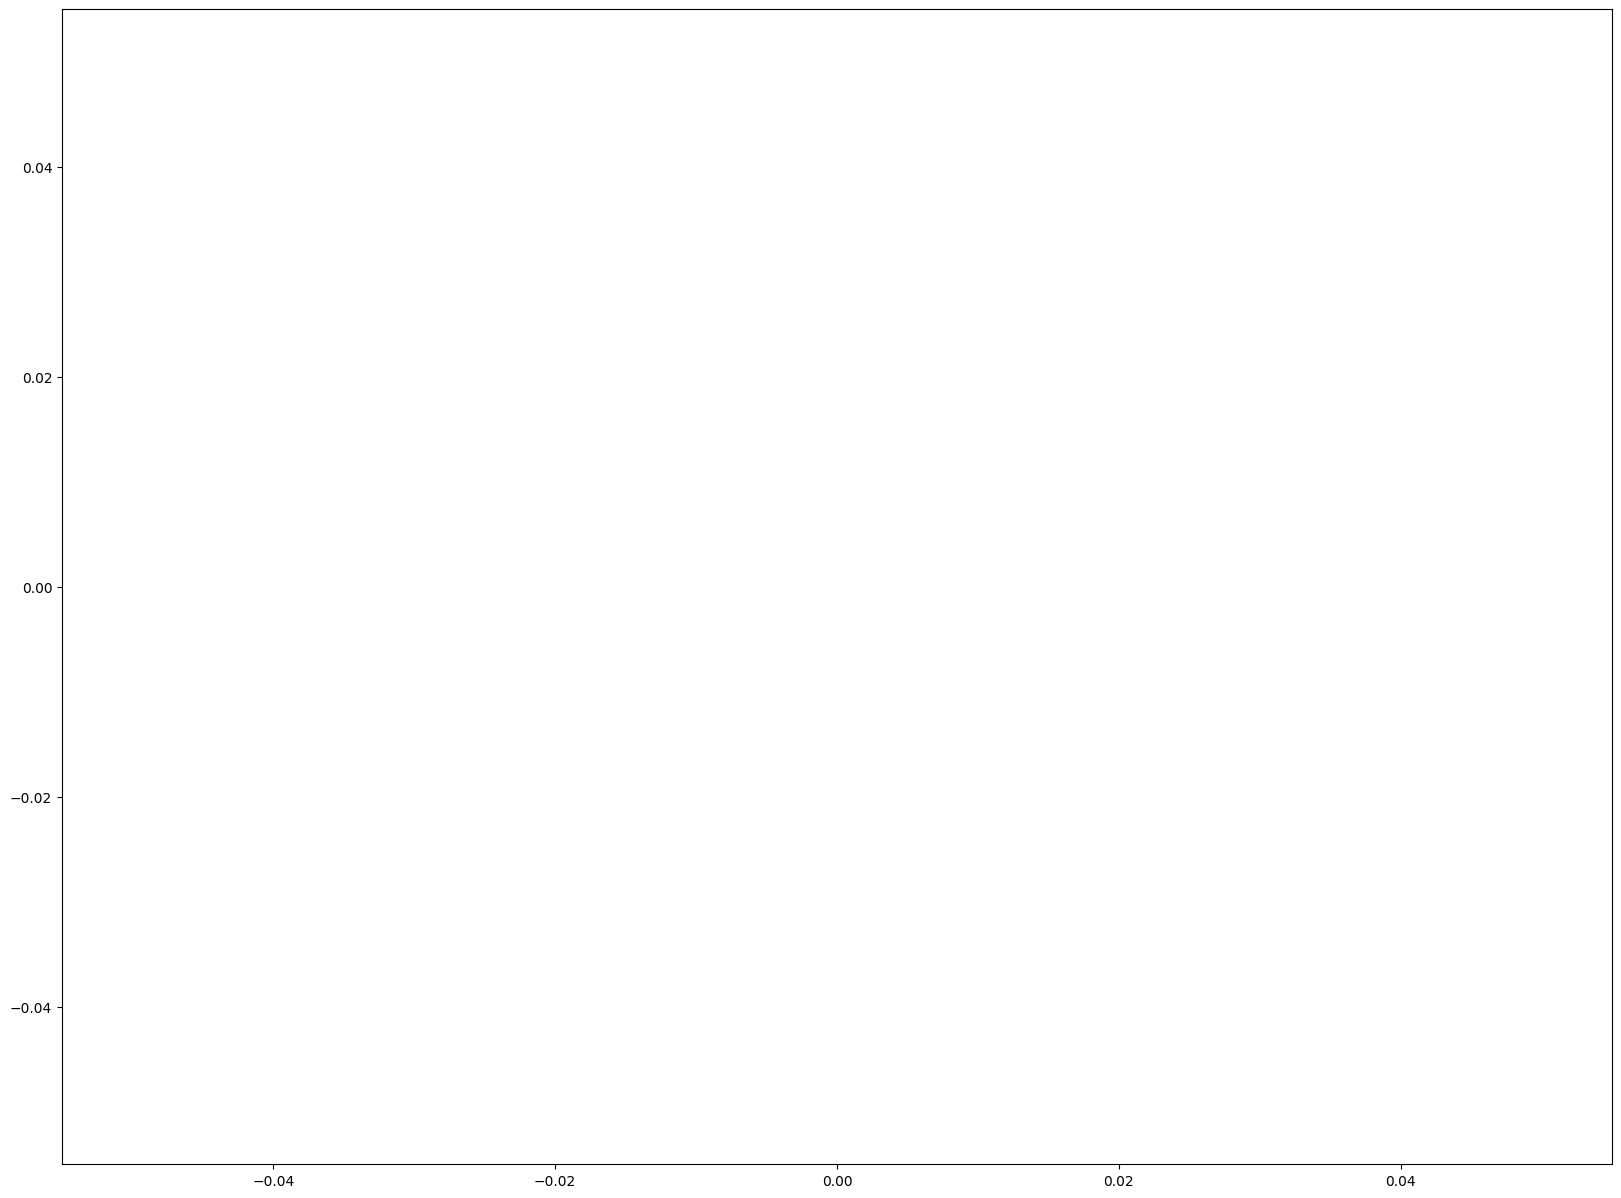

In [21]:
plt.figure(figsize=(20,15))

midazolam_lidocaine_df = df_flumazenil[df_flumazenil["vtm_name"] == "Midazolam + Lidocaine"]

midazolam_lidocaine_df.groupby(["ods_name", "vtm_name"])["quantity"].sum().sort_values(ascending=False).plot(kind="barh")

plt.gca().invert_yaxis()
plt.title("Quantity of Midazolam + Lidocaine combination prescribed per trust")
plt.grid()
plt.show()

### cost of midazolam per region

In [ ]:
plt.figure(figsize=(15,15))

df_flumazenil.groupby("region")["indicative_cost"].sum().plot(kind='bar')
current_values = plt.gca().get_yticks()
formatted_labels = [f'{int(value/1000000)}M' for value in current_values]
plt.gca().set_yticklabels(formatted_labels)
plt.title("Cost of midazolam prescribed per region")
# plt.grid()
plt.show()

### quantity of midazolam per region

In [ ]:
plt.figure(figsize=(15,15))

df_flumazenil.groupby("region")["quantity"].sum().plot(kind='bar')
current_values = plt.gca().get_yticks()
formatted_labels = [f'{int(value/1000000)}M' for value in current_values]
plt.gca().set_yticklabels(formatted_labels)
plt.title("Quantity of midazolam prescribed per region")
# plt.grid()
plt.show()

### cost of midazolam prescribed per trust

In [ ]:
plt.figure(figsize=(20,15))

df_flumazenil.groupby("ods_name")["indicative_cost"].sum().sort_values(ascending=False)[:20].plot(kind="barh")

current_values = plt.gca().get_xticks()
formatted_labels = [f'{int(value/100000)}K' for value in current_values]
plt.gca().set_xticklabels(formatted_labels)
plt.gca().invert_yaxis()
plt.title("Cost of midazolam prescribed per trust")
plt.grid()
plt.show()

### quantity of midazolam prescribed per trust

In [ ]:
plt.figure(figsize=(20,15))

df_flumazenil.groupby("ods_name")["quantity"].sum().sort_values(ascending=False)[:20].plot(kind="barh")

current_values = plt.gca().get_xticks()
formatted_labels = [f'{int(value/1000000)}M' for value in current_values]
plt.gca().set_xticklabels(formatted_labels)
plt.gca().invert_yaxis()
plt.title("Quantity of midazolam prescribed per trust")
plt.grid()
plt.show()

In [ ]:
quantity_per_trust = df_flumazenil.groupby("ods_name")["quantity"].sum().sort_values(ascending=False)

quantity_per_trust.columns = ["Trust", "Quantity Prescribed"]

quantity_per_trust.tail()

cost of midazolam per formulation

In [ ]:
figure = plt.figure(figsize=(20,15))

# plt.ticklabel_format(style="plain")
plt.xlabel("Indicative Cost")

df_flumazenil.groupby("vmp_name")["indicative_cost"].sum().sort_values(ascending=True).plot(kind="barh")

current_values = plt.gca().get_xticks()
formatted_labels = [f'{int(value/1000000)}M' for value in current_values]
plt.gca().set_xticklabels(formatted_labels)

plt.title("Indicative cost of midazolam per formulation")
plt.grid()
plt.show()

yearly usage of midazolam per trust

In [ ]:
# fig, ax = plt.subplots(figsize=(10,10))

# ax.set_ylabel("Quantity prescribed")
# ax.set_xlabel("Year")

ax = df_flumazenil.groupby(["year", "ods_name"])["quantity"].sum().sort_values(ascending=False)[:40].unstack().plot(kind="barh", figsize=(30,30), stacked=True)
# plt.gca().invert_yaxis()

current_values = plt.gca().get_xticks()
formatted_labels = [f'{int(value/1000000)}M' for value in current_values]
plt.gca().set_xticklabels(formatted_labels)

plt.title("Yearly usage of midazolam per trust")
plt.grid()
plt.show()

yearly usage of midazolam

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

ax.set_ylabel("Quantity prescribed")
ax.set_xlabel("Year")

df_flumazenil.groupby("year")["quantity"].sum().plot()

current_values = plt.gca().get_yticks()
formatted_labels = [f'{int(value/1000000)}M' for value in current_values]
plt.gca().set_yticklabels(formatted_labels)

plt.title("Quantity of midazolam prescribed per year")
plt.grid()
plt.show()

monthly usage of midazolam per trust

In [ ]:
df_flumazenil.groupby(["month", "ods_name"])["quantity"].sum().sort_values(ascending=False)[:40].unstack().plot(kind="barh", figsize=(30,30), stacked=True)

current_values = plt.gca().get_xticks()
formatted_labels = [f'{int(value/1000000)}M' for value in current_values]
plt.gca().set_xticklabels(formatted_labels)

plt.title("Monthly usage of midazolam per trust")
plt.grid()
plt.show()

formulations mostly used

In [ ]:
figure = plt.figure(figsize=(10,10))
plt.ticklabel_format(style="plain")
plt.ylabel("Quantity of formulations prescribed")
# plt.xlabel("Year")

print(f"There are {len(df_flumazenil['vmp_name'].unique())} VMPs of midazolam prescribed")
df_flumazenil["vmp_name"].value_counts().plot(kind="bar", figsize=(17, 10))

current_values = plt.gca().get_yticks()
formatted_labels = [f'{int(value/1000)}K' for value in current_values]
plt.gca().set_yticklabels(formatted_labels)

plt.title("Quantity prescribed per midazolam formulation")
plt.grid()
plt.show()

In [ ]:
df_flumazenil["vmp_name"].value_counts().sort_values(ascending=False)[:10]